# Importing packages

In [ ]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

# Decision Trees and Random Fortest

## Output variable: Practice of exercise During

In [4]:
dim(pa_dataset)

[1] 1241   74

In [5]:
table(pa_dataset[, "PA_practice_during"])


dont_practice      practice 
          345           896 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Applying augmentation into the training set

In [3]:
pa_train.aug <- data_augmentation(
    train_data=pa_train,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(pa_dataset))
)

table(pa_train.aug[, "PA_practice_during"])



dont_practice      practice 
          628           628 

### Decision Tree: Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            50       43
  practice                 53      225
                                          
               Accuracy : 0.7412          
                 95% CI : (0.6935, 0.7851)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.2267          
                                          
                  Kappa : 0.335           
                                          
 Mcnemar's Test P-Value : 0.3583          
                                          
            Sensitivity : 0.4854          
            Specificity : 0.8396          
         Pos Pred Value : 0.5376          
         Neg Pred Value : 0.8094          
             Prevalence : 0.2776          
         Detection Rate : 0.1348          
   Detection Prevalence : 0.2507          
      Balanced Accuracy : 0.6625          
                                          
       '

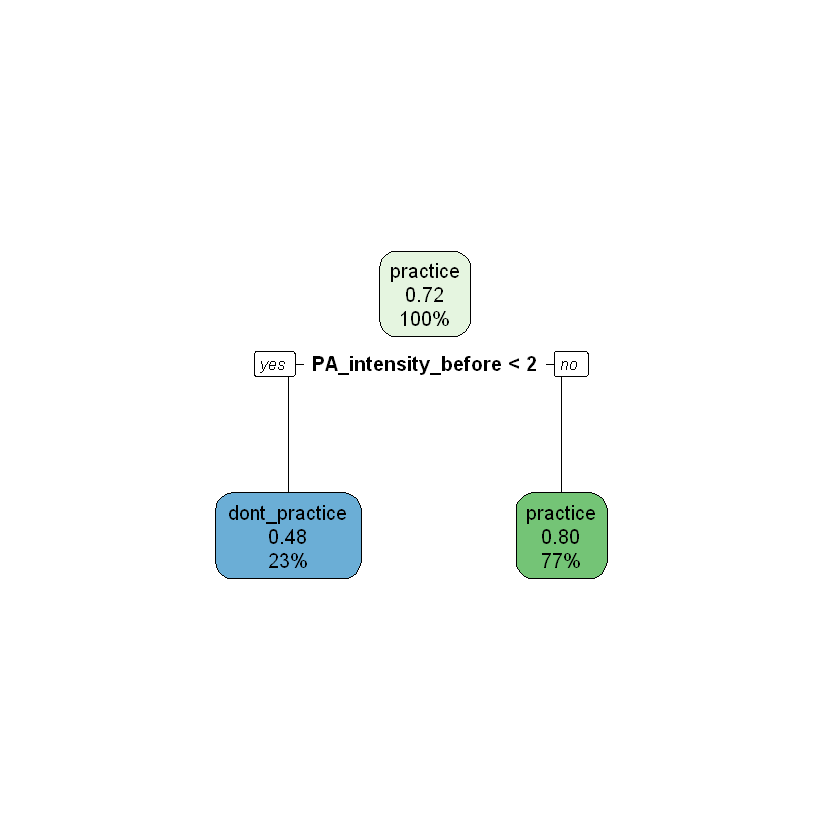

In [4]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_train,
    test_data= pa_test,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)

rpart.plot(model$result$finalModel)



### Decision Tree: Accuracy metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            76      117
  practice                 27      151
                                          
               Accuracy : 0.6119          
                 95% CI : (0.5602, 0.6617)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2374          
                                          
 Mcnemar's Test P-Value : 1.201e-13       
                                          
            Sensitivity : 0.7379          
            Specificity : 0.5634          
         Pos Pred Value : 0.3938          
         Neg Pred Value : 0.8483          
             Prevalence : 0.2776          
         Detection Rate : 0.2049          
   Detection Prevalence : 0.5202          
      Balanced Accuracy : 0.6506          
                                          
       '

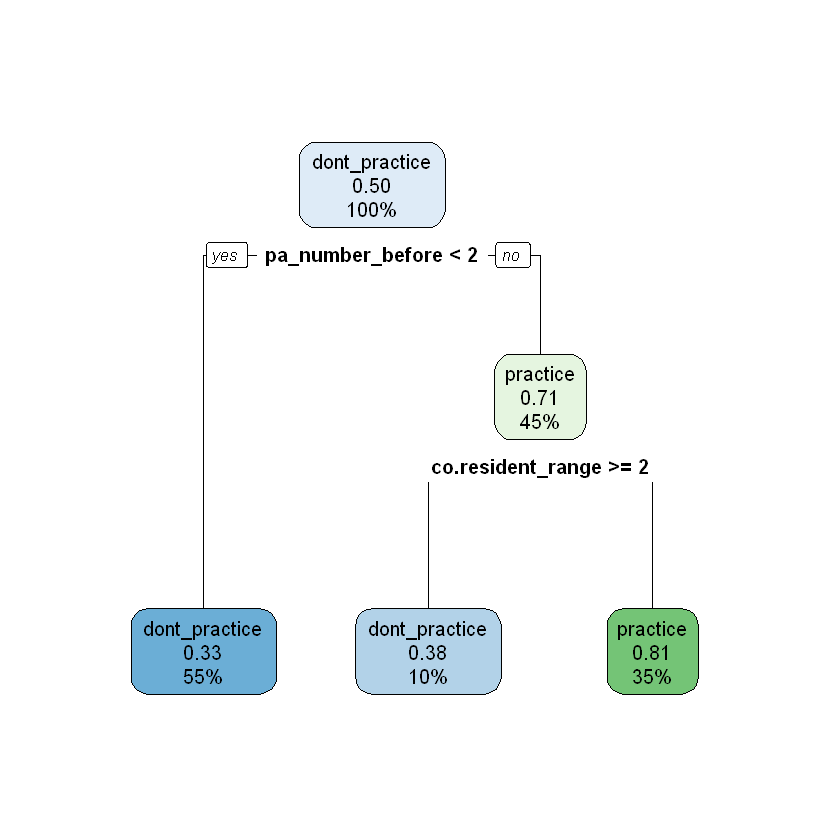

In [6]:
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

### RF: Kappa metric without augmentation

In [14]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_train,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            44       28
  practice                 59      240
                                         
               Accuracy : 0.7655         
                 95% CI : (0.719, 0.8077)
    No Information Rate : 0.7224         
    P-Value [Acc > NIR] : 0.034526       
                                         
                  Kappa : 0.3557         
                                         
 Mcnemar's Test P-Value : 0.001298       
                                         
            Sensitivity : 0.4272         
            Specificity : 0.8955         
         Pos Pred Value : 0.6111         
         Neg Pred Value : 0.8027         
             Prevalence : 0.2776         
         Detection Rate : 0.1186         
   Detection Prevalence : 0.1941         
      Balanced Accuracy : 0.6614         
                                         
       'Positive' Class : d

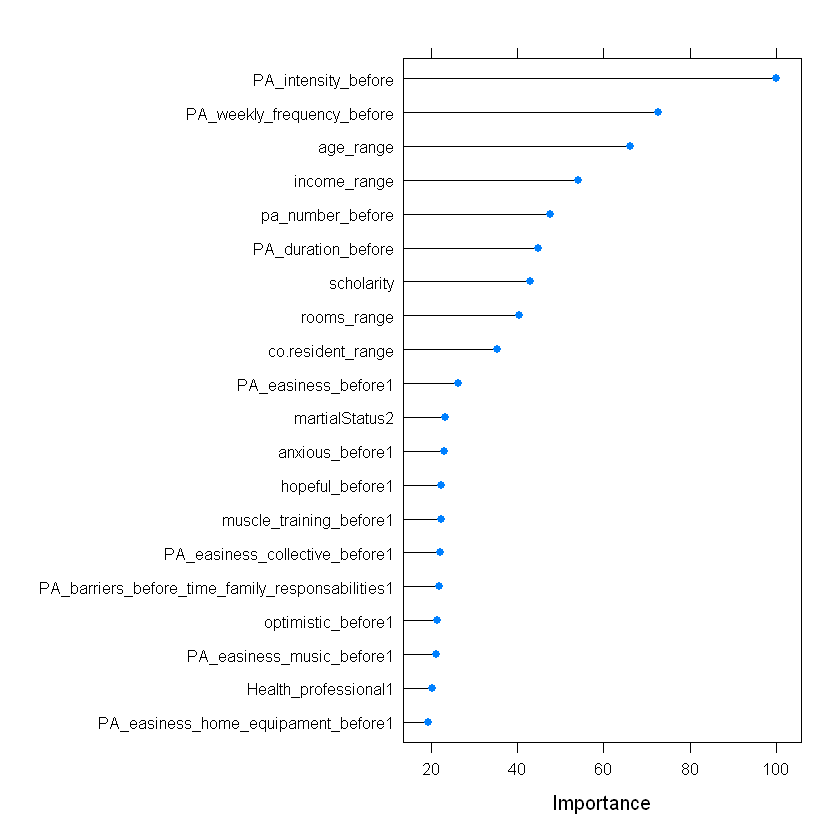

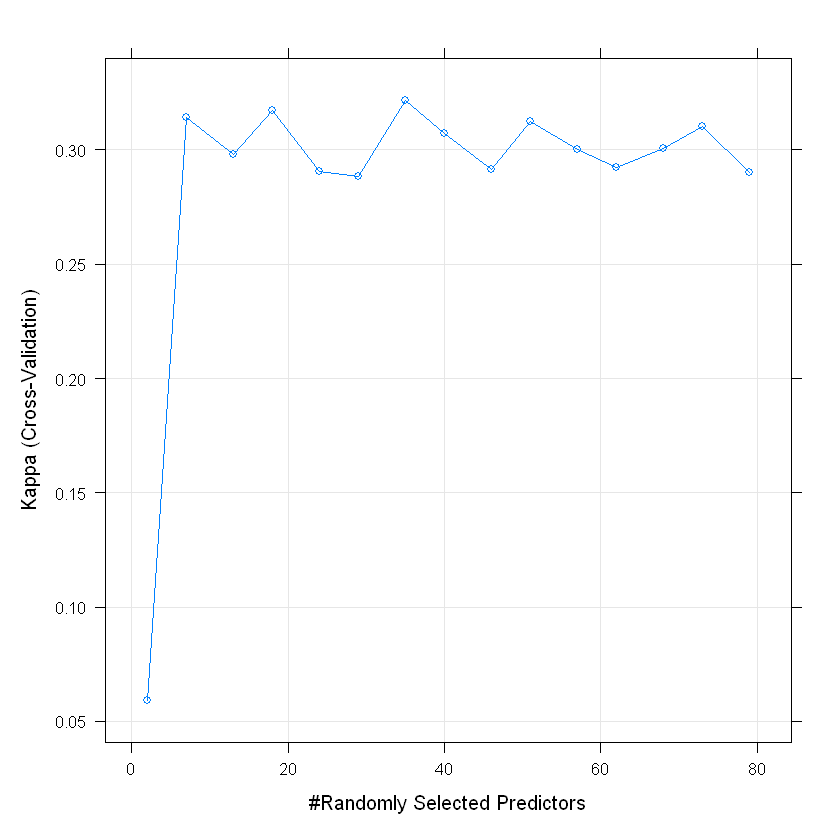

In [15]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF: Kappa metric with augmentation

In [16]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            43       21
  practice                 60      247
                                          
               Accuracy : 0.7817          
                 95% CI : (0.7361, 0.8227)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.005486        
                                          
                  Kappa : 0.3839          
                                          
 Mcnemar's Test P-Value : 2.419e-05       
                                          
            Sensitivity : 0.4175          
            Specificity : 0.9216          
         Pos Pred Value : 0.6719          
         Neg Pred Value : 0.8046          
             Prevalence : 0.2776          
         Detection Rate : 0.1159          
   Detection Prevalence : 0.1725          
      Balanced Accuracy : 0.6696          
                                          
       '

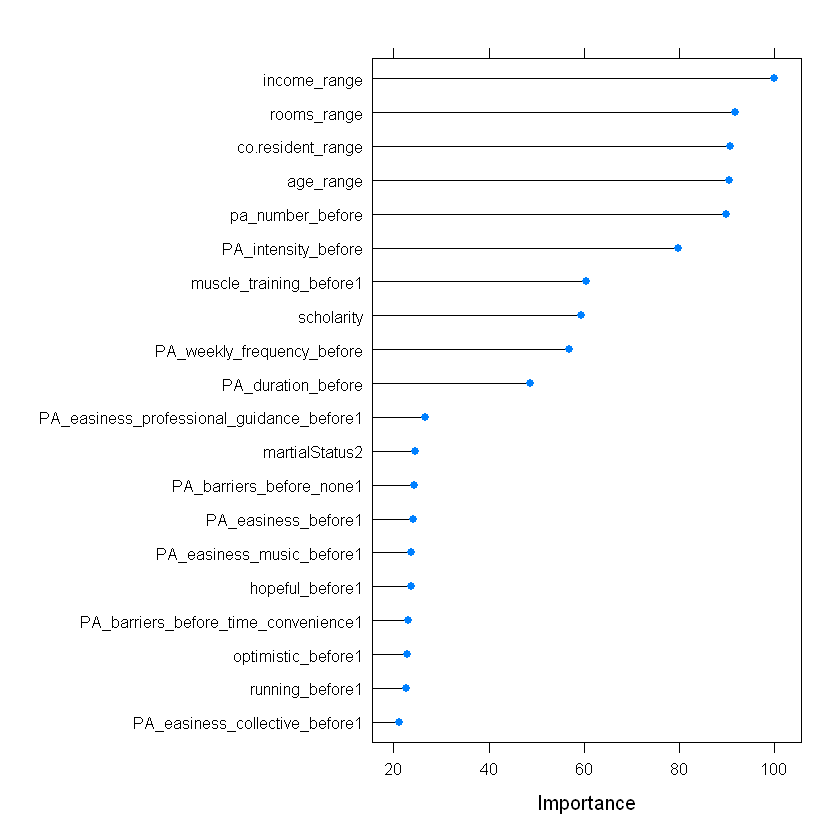

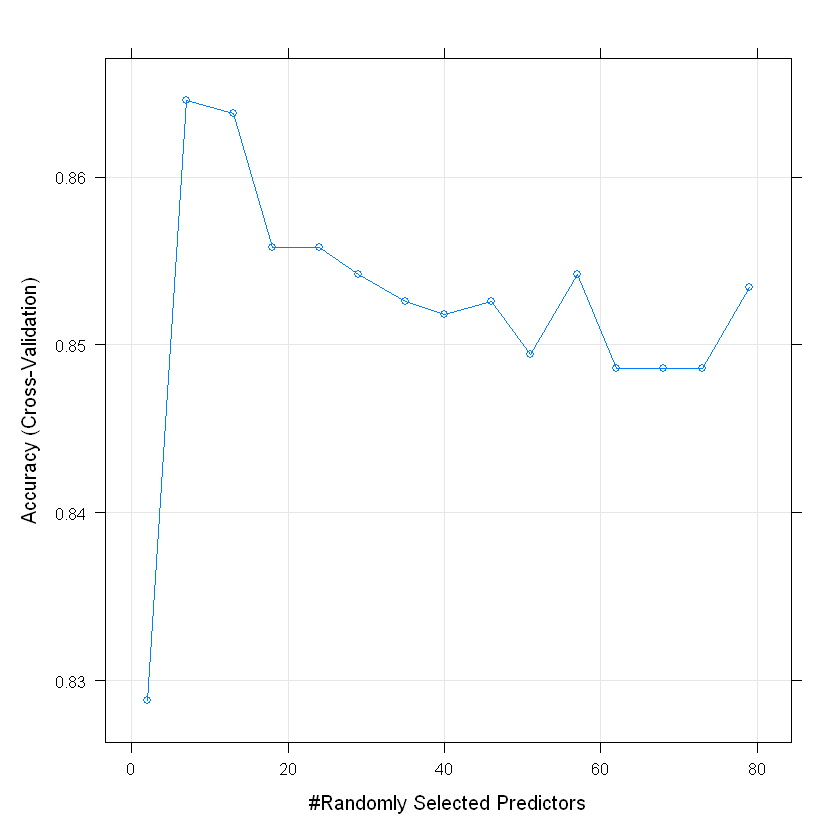

In [17]:
plot(varImp(model$result), top=20)
plot(model$result)


## Output variable: sedentary time range

In [19]:
table(sedentary_dataset[, "sedentary_time_range_during"])


   8_hour_or_more less_then_8_hours 
              437               805 

### Applying augmentation into the training set

In [20]:
sedentary_train.aug <- data_augmentation(
    train_data=sedentary_train,
    yname="sedentary_time_range_during",
    maj_class = "less_then_8_hours",
    min_classes = c("8_hour_or_more"),
    ycol=match("sedentary_time_range_during",names(sedentary_dataset))
)

table(sedentary_train.aug[, "sedentary_time_range_during"])



   8_hour_or_more less_then_8_hours 
              564               564 

### Kappa metric without augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                67                38
  less_then_8_hours             64               203
                                          
               Accuracy : 0.7258          
                 95% CI : (0.6774, 0.7705)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.0008209       
                                          
                  Kappa : 0.3706          
                                          
 Mcnemar's Test P-Value : 0.0133099       
                                          
            Sensitivity : 0.5115          
            Specificity : 0.8423          
         Pos Pred Value : 0.6381          
         Neg Pred Value : 0.7603          
             Prevalence : 0.3522          
         Detection Rate : 0.1801          
   Detection Prevalence : 0.2823          
      Balanced Accuracy : 0.6769          
     

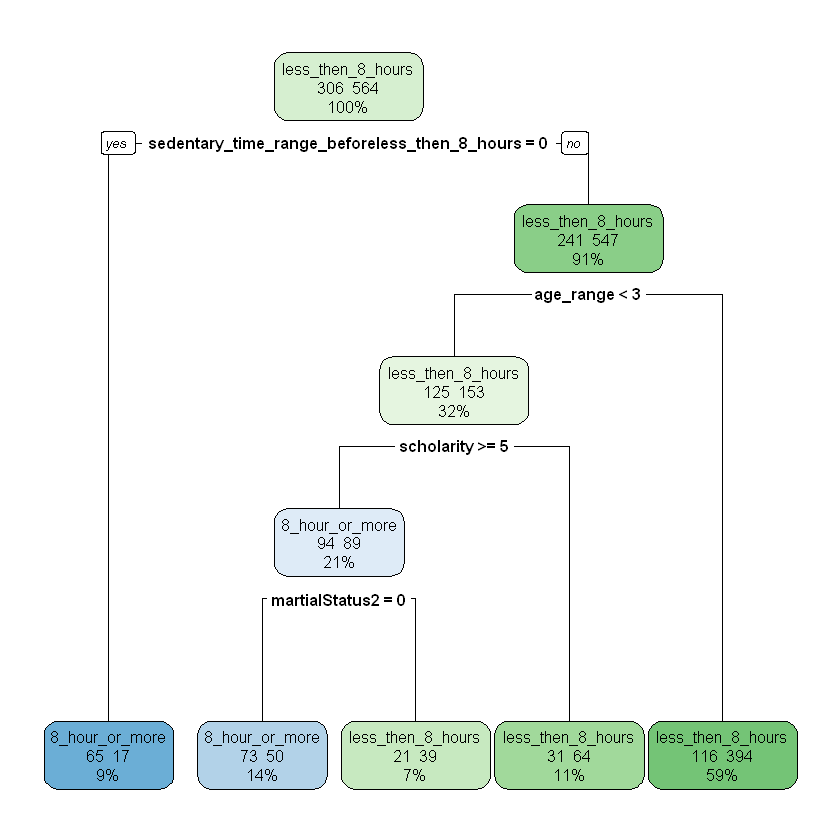

In [22]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### Accuracy metric with augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                85                76
  less_then_8_hours             46               165
                                          
               Accuracy : 0.672           
                 95% CI : (0.6218, 0.7196)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.178299        
                                          
                  Kappa : 0.3169          
                                          
 Mcnemar's Test P-Value : 0.008651        
                                          
            Sensitivity : 0.6489          
            Specificity : 0.6846          
         Pos Pred Value : 0.5280          
         Neg Pred Value : 0.7820          
             Prevalence : 0.3522          
         Detection Rate : 0.2285          
   Detection Prevalence : 0.4328          
      Balanced Accuracy : 0.6668          
     

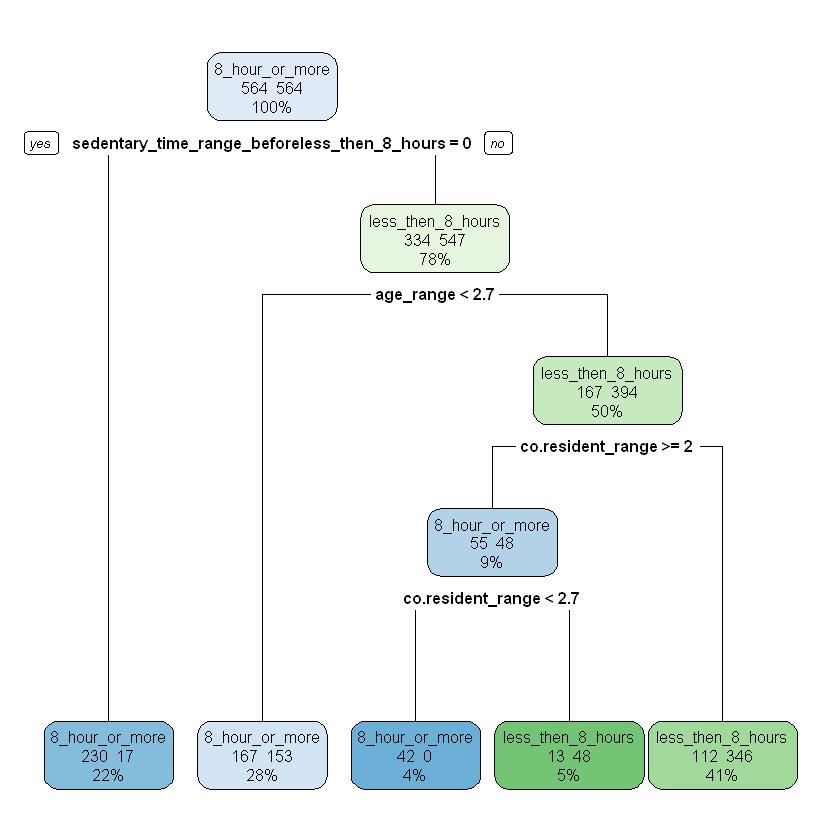

In [23]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = sedentary_train.aug,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### RF: Kappa metric without augmentation

In [24]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sedentary_train,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                74                25
  less_then_8_hours             57               216
                                         
               Accuracy : 0.7796         
                 95% CI : (0.734, 0.8207)
    No Information Rate : 0.6478         
    P-Value [Acc > NIR] : 2.403e-08      
                                         
                  Kappa : 0.4884         
                                         
 Mcnemar's Test P-Value : 0.0006185      
                                         
            Sensitivity : 0.5649         
            Specificity : 0.8963         
         Pos Pred Value : 0.7475         
         Neg Pred Value : 0.7912         
             Prevalence : 0.3522         
         Detection Rate : 0.1989         
   Detection Prevalence : 0.2661         
      Balanced Accuracy : 0.7306         
                       

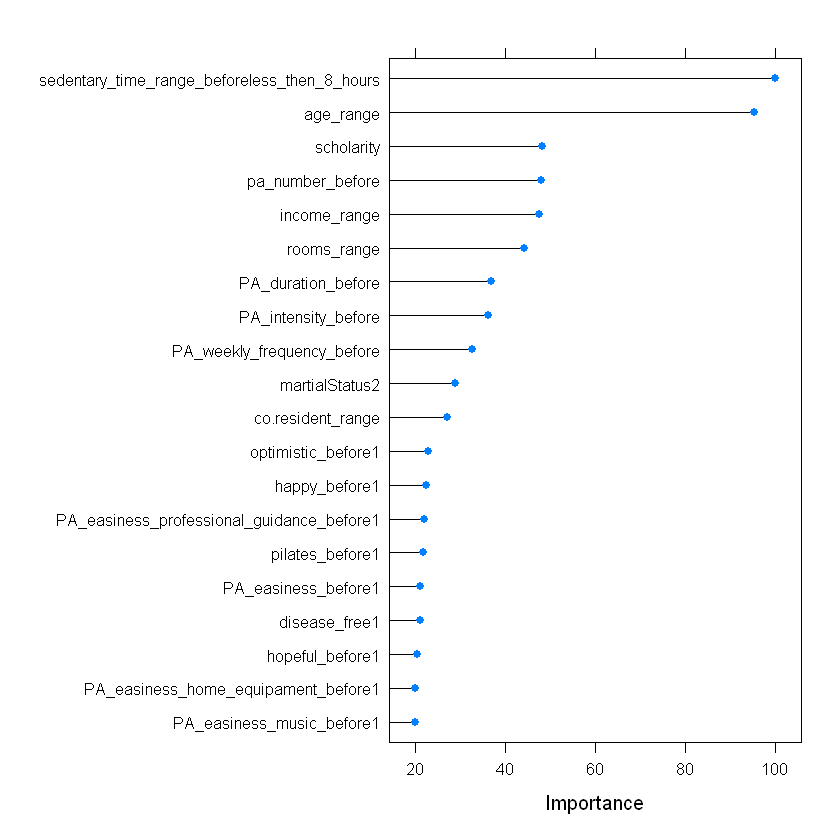

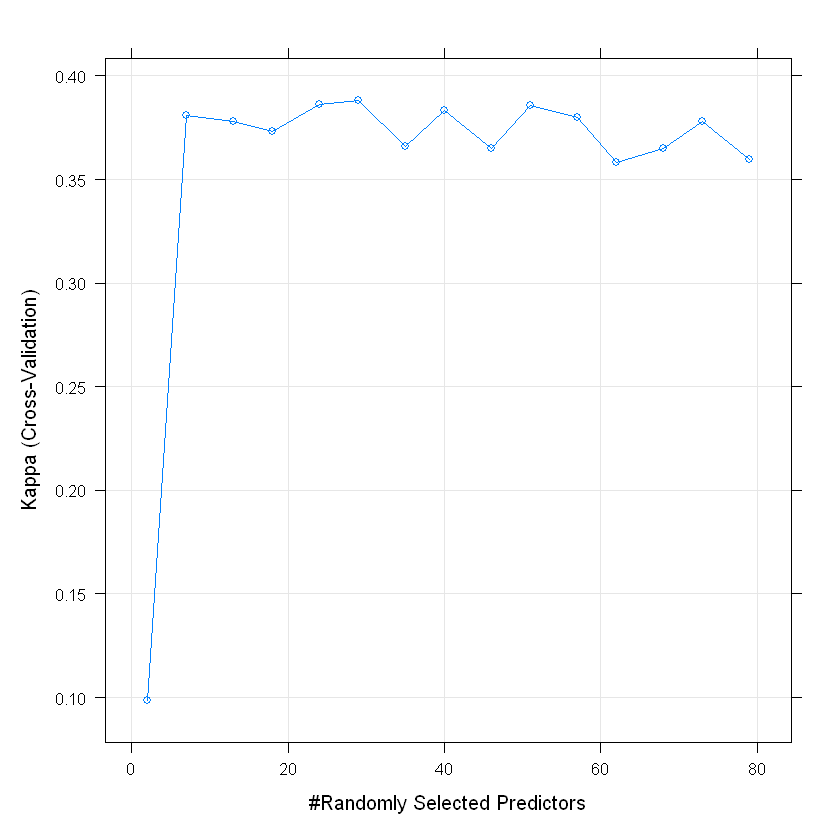

In [25]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF: Accuracy metric with augmentation

In [26]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = sedentary_train.aug,
    test_data=sedentary_test,
    yname="sedentary_time_range_during",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                70                23
  less_then_8_hours             61               218
                                          
               Accuracy : 0.7742          
                 95% CI : (0.7283, 0.8157)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 8.817e-08       
                                          
                  Kappa : 0.47            
                                          
 Mcnemar's Test P-Value : 5.413e-05       
                                          
            Sensitivity : 0.5344          
            Specificity : 0.9046          
         Pos Pred Value : 0.7527          
         Neg Pred Value : 0.7814          
             Prevalence : 0.3522          
         Detection Rate : 0.1882          
   Detection Prevalence : 0.2500          
      Balanced Accuracy : 0.7195          
     

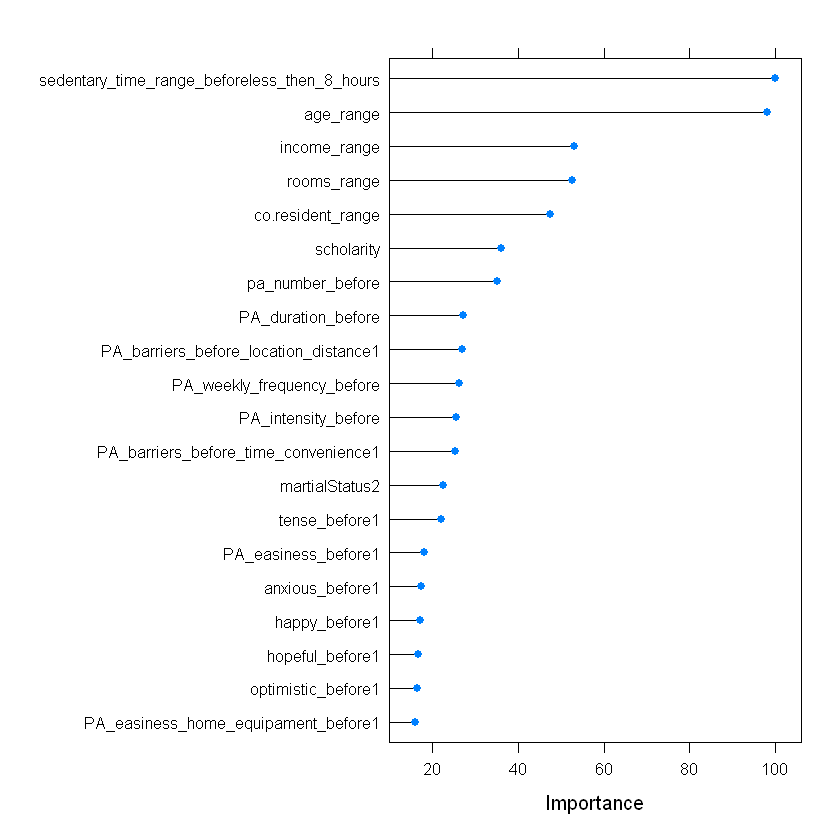

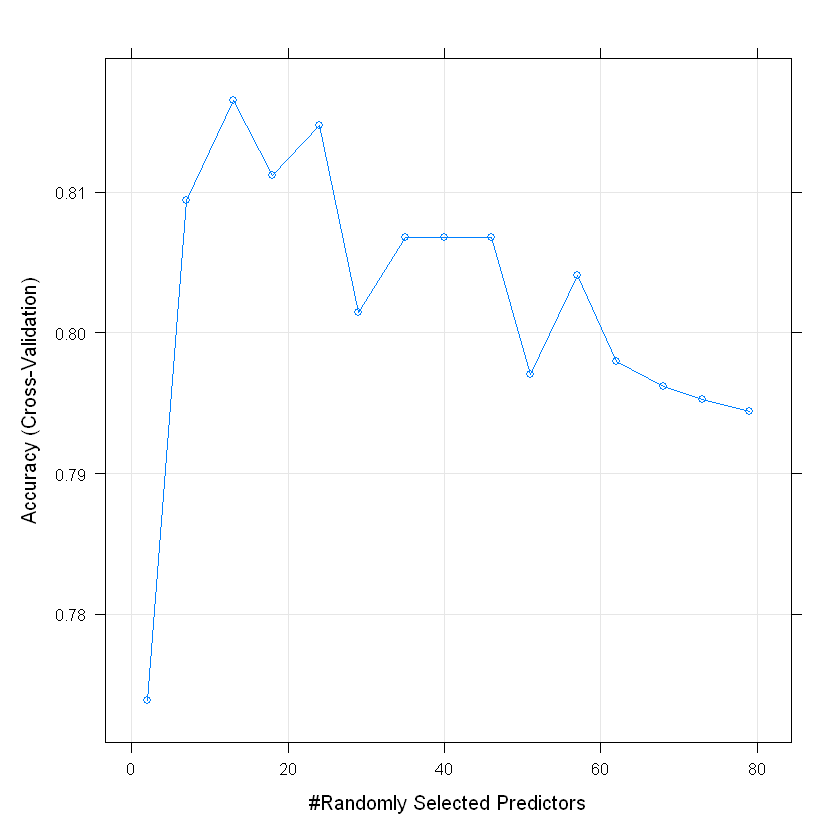

In [27]:
plot(varImp(model$result), top=20)
plot(model$result)


## Output variable: Practice of exercise behavior

In [32]:
dim(pa_behavior_dataset_1)
table(pa_behavior_dataset_1[, "pa_behavior"])

[1] 1097   73


change_to_dont_practice          still_practice 
                    270                     827 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Applying augmentation into the training set: practice before

In [33]:
pa_behavior_train.aug <- data_augmentation(
    train_data=pa_behavior_train,
    yname="pa_behavior",
    maj_class = "still_practice",
    min_classes = c("change_to_dont_practice"),
    ycol=match("pa_behavior",names(pa_behavior_dataset_1))
)

table(pa_behavior_train.aug[, "pa_behavior"])



change_to_dont_practice          still_practice 
                    579                     579 

### Kappa metric without augmentation: practice before

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      21             11
  still_practice                               60            237
                                                 
               Accuracy : 0.7842                 
                 95% CI : (0.7358, 0.8274)       
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 0.1109                 
                                                 
                  Kappa : 0.2699                 
                                                 
 Mcnemar's Test P-Value : 1.223e-08              
                                                 
            Sensitivity : 0.25926                
            Specificity : 0.95565                
         Pos Pred Value : 0.65625                
         Neg Pred Value : 0.79798                
             Prevalence : 0.24620    

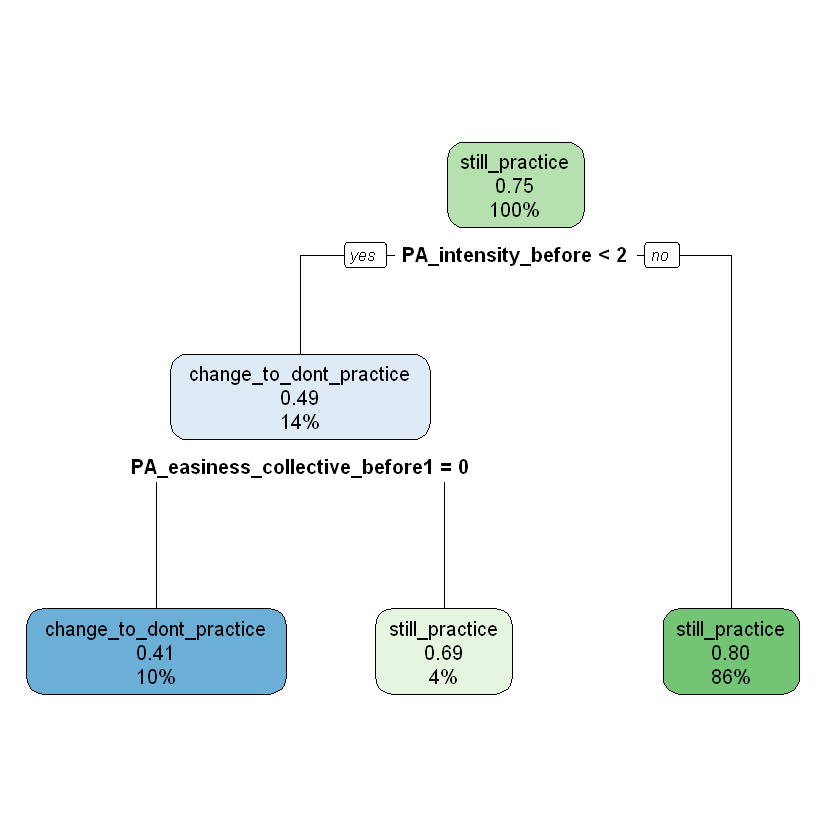

In [34]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_behavior_train,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### Accuracy metric with augmentation: practice before

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      50             85
  still_practice                               31            163
                                                 
               Accuracy : 0.6474                 
                 95% CI : (0.5931, 0.699)        
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 1                      
                                                 
                  Kappa : 0.2242                 
                                                 
 Mcnemar's Test P-Value : 8.614e-07              
                                                 
            Sensitivity : 0.6173                 
            Specificity : 0.6573                 
         Pos Pred Value : 0.3704                 
         Neg Pred Value : 0.8402                 
             Prevalence : 0.2462     

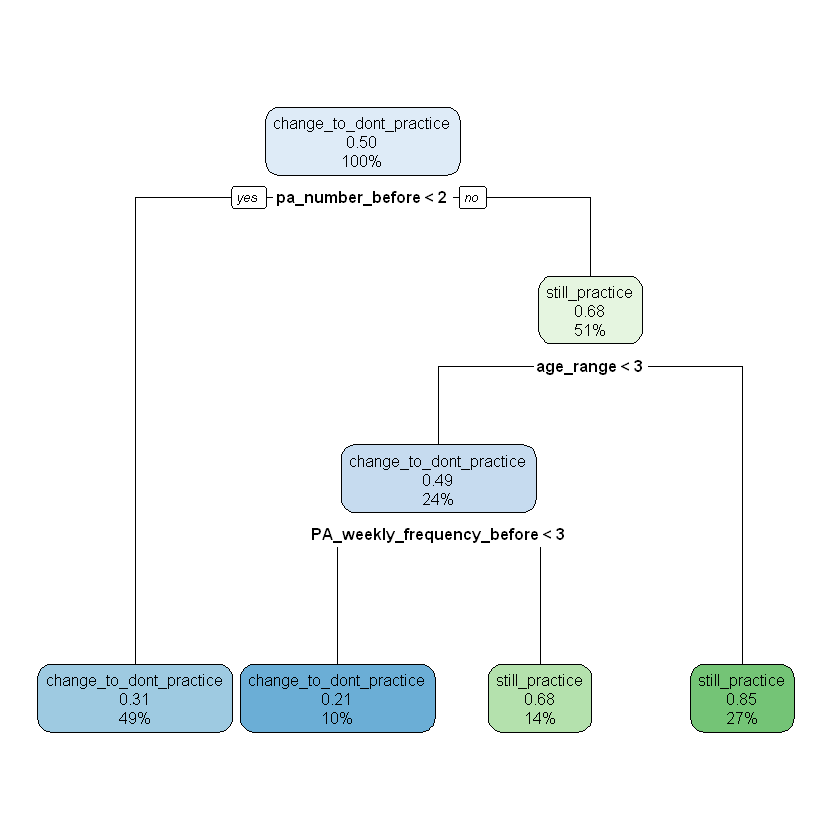

In [35]:
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = pa_behavior_train.aug,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

### RF practice before: Kappa metric without augmentation

In [36]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_behavior_train,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      25             10
  still_practice                               56            238
                                                 
               Accuracy : 0.7994                 
                 95% CI : (0.752, 0.8413)        
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 0.0297                 
                                                 
                  Kappa : 0.3318                 
                                                 
 Mcnemar's Test P-Value : 3.04e-08               
                                                 
            Sensitivity : 0.30864                
            Specificity : 0.95968                
         Pos Pred Value : 0.71429                
         Neg Pred Value : 0.80952                
             Prevalence : 0.24620    

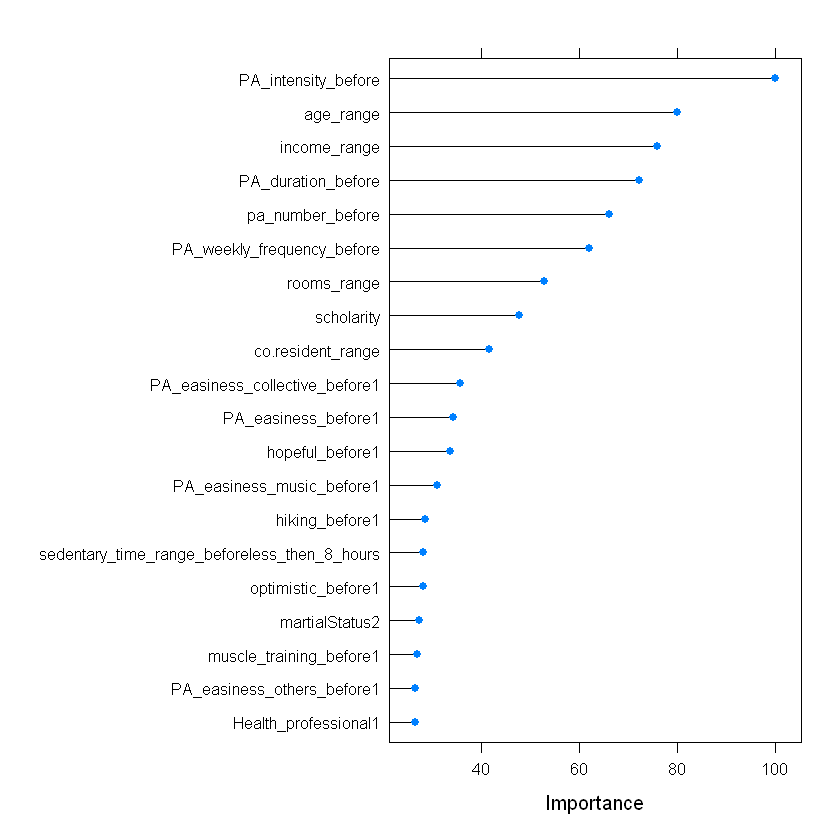

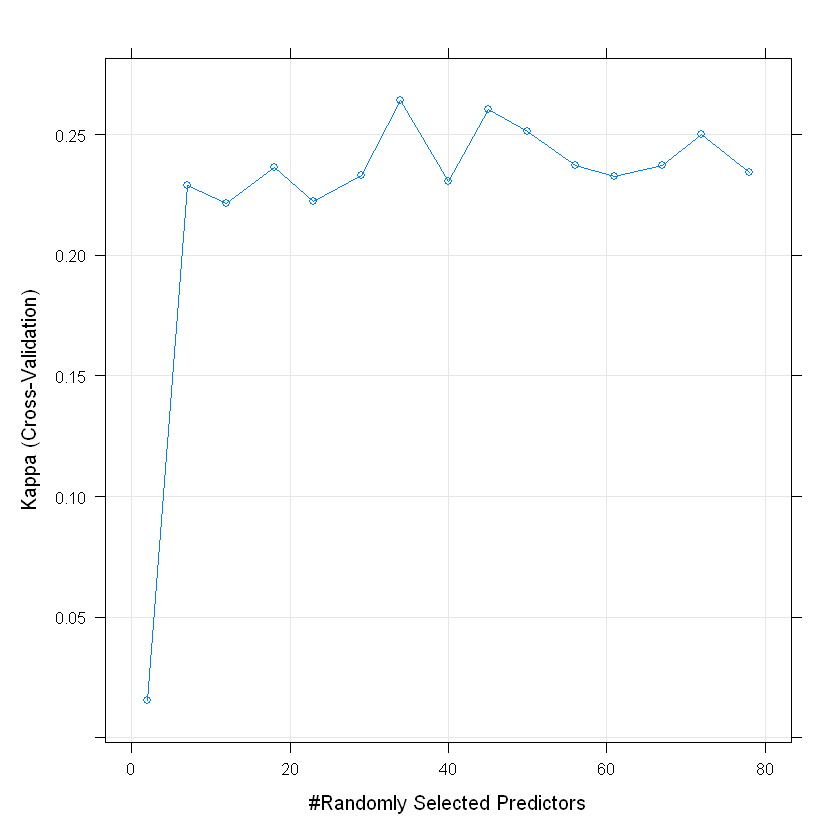

In [37]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF practice before: Accuracy metric with augmentation

In [38]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = pa_behavior_train.aug,
    test_data=pa_behavior_test,
    yname="pa_behavior",
    length = 15
)
print(model$matrix)

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      24              3
  still_practice                               57            245
                                                 
               Accuracy : 0.8176                 
                 95% CI : (0.7716, 0.8579)       
    No Information Rate : 0.7538                 
    P-Value [Acc > NIR] : 0.003493               
                                                 
                  Kappa : 0.3665                 
                                                 
 Mcnemar's Test P-Value : 7.795e-12              
                                                 
            Sensitivity : 0.29630                
            Specificity : 0.98790                
         Pos Pred Value : 0.88889                
         Neg Pred Value : 0.81126                
             Prevalence : 0.24620    

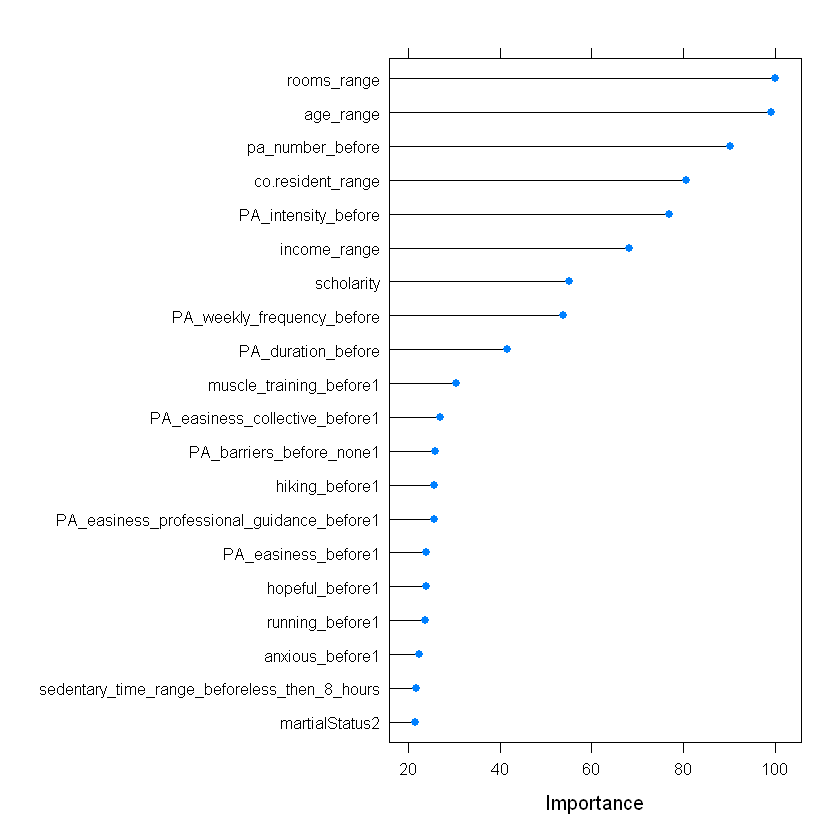

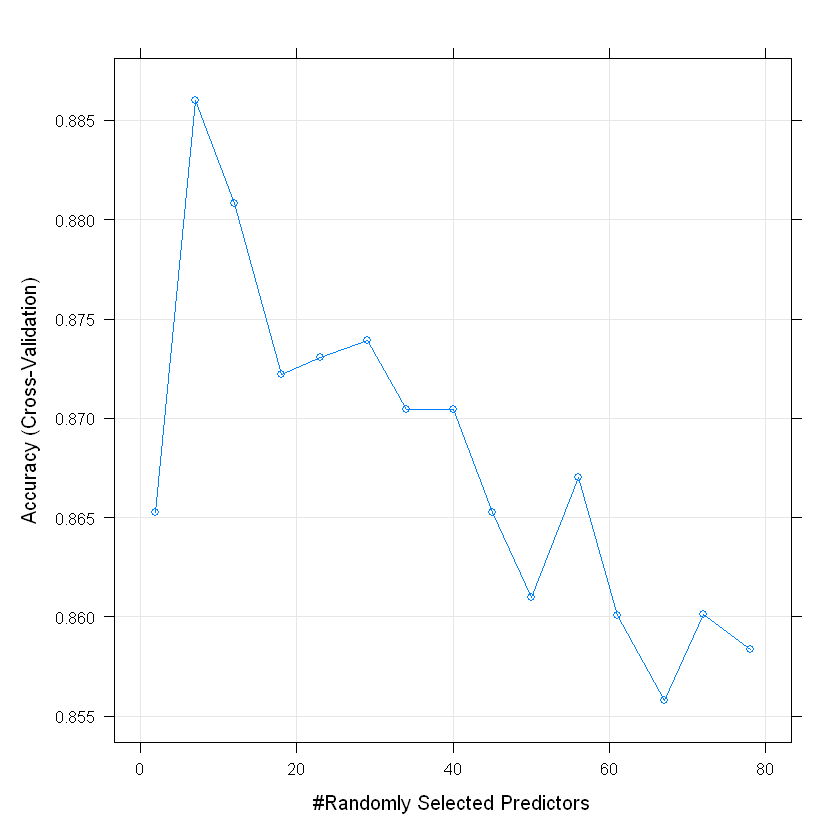

In [39]:
plot(varImp(model$result), top=20)
plot(model$result)
